# Audio energy and normalize audio

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import sys
sys.path.append('/home/catskills/Desktop/openasr20/end2end_asr_pytorch')

In [4]:
%matplotlib inline
import matplotlib.pylab as plt

In [9]:
import numpy as np
from glob import glob
from tqdm import tqdm
import os

In [6]:
language='amharic'

In [13]:
clip_fns=glob(f'NIST/openasr20_{language}/build/audio_split/*')

In [11]:
len(clips)

9842

In [14]:
import librosa
sample_rate=8000

In [17]:
clips=[(fn, librosa.load(fn, sr=sample_rate)[0]) for fn in tqdm(clip_fns)]

100%|██████████| 9842/9842 [00:01<00:00, 6863.95it/s]


In [19]:
import pyloudnorm as pyln

In [51]:
meter = pyln.Meter(sample_rate, block_size=0.100)

In [52]:
loudnesses=[]
problems=[]
for fn, waveform in tqdm(clips):
    try:
        loudnesses.append((fn, meter.integrated_loudness(waveform)))
    except:
        problems.append((fn, waveform))

100%|██████████| 9842/9842 [00:30<00:00, 322.32it/s]


In [53]:
len(problems)

0

In [54]:
%matplotlib inline
from matplotlib.pylab import *

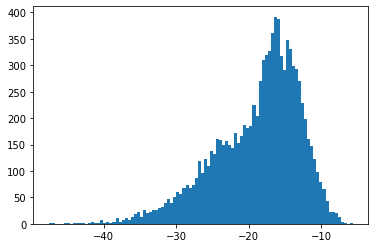

In [57]:
plt.hist([y for x,y in loudnesses],bins=100);

In [60]:
target_loudness=np.median(sorted([y for x,y in loudnesses]))
target_loudness

-17.454496613636074

In [76]:
target_loudness=-18

In [68]:
clips[0]

('NIST/openasr20_amharic/build/audio_split/BABEL_OP3_307_97588_20140415_223241_outLine_033_187.335_188.615.wav',
 array([ 0.00219727, -0.01098633, -0.02392578, ..., -0.00073242,
        -0.00024414,  0.00024414], dtype=float32))

In [86]:
clip_loudnesses=list(sorted([(z,x,y) for (x,y), (w,z) in zip(clips, loudnesses)]))

In [88]:
from IPython.display import Audio

In [103]:
(loudness, fn, waveform, ) = clip_loudnesses[-1]
loudness

-5.616052747188402

In [104]:
Audio(waveform,rate=sample_rate)

In [105]:
loudness_normalized_audio = pyln.normalize.loudness(waveform, loudness, target_loudness)

In [106]:
Audio(loudness_normalized_audio,rate=sample_rate)

In [107]:
meter.integrated_loudness(loudness_normalized_audio)

-17.999999817602866

In [108]:
meter.integrated_loudness(waveform)

-5.616052747188402

In [109]:
normal_dir=f'NIST/openasr20_{language}/build/audio_split_normalized_to_18db'

In [110]:
os.mkdir(normal_dir)

In [112]:
import soundfile as sf

In [113]:
for loudness, fn, waveform in tqdm(clip_loudnesses):
    loudness_normalized_audio = pyln.normalize.loudness(waveform, loudness, target_loudness)
    audio_file=fn.replace('/audio_split/', '/audio_split_normalized_to_18db/')
    sf.write(audio_file, loudness_normalized_audio, sample_rate)

  0%|          | 0/9842 [00:00<?, ?it/s]/home/catskills/anaconda3/envs/openasr/lib/python3.8/site-packages/pyloudnorm/normalize.py:62: UserWarning: Possible clipped samples in output.
  warnings.warn("Possible clipped samples in output.")
100%|██████████| 9842/9842 [00:25<00:00, 387.15it/s]


In [114]:
clip_loudnesses[0]

(-47.58463940723355,
 'NIST/openasr20_amharic/build/audio_split/BABEL_OP3_307_90417_20140822_224049_outLine_000_0.000_1.295.wav',
 array([-0.00024414,  0.00024414,  0.00024414, ...,  0.00073242,
         0.00073242,  0.00073242], dtype=float32))

In [115]:
clip_loudnesses[-1]

(-5.616052747188402,
 'NIST/openasr20_amharic/build/audio_split/BABEL_OP3_307_26602_20140702_235542_outLine_065_400.185_400.905.wav',
 array([ 0.00073242,  0.00024414, -0.00024414, ...,  0.0012207 ,
         0.00561523,  0.0065918 ], dtype=float32))